## Conserved marker analysis



Identifying genes that distinguish a given cell cluster from all others

#### Import libraries

In [1]:
library(Seurat)
library(dplyr)
library(magrittr)
library(scales)
library(ggplot2)
library(xlsx)
library(tidyr)

Attaching SeuratObject


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union





Attaching package: 'tidyr'


The following object is masked from 'package:magrittr':

    extract




#### Load in .rds files

In [2]:
LS.integrated<-readRDS(file = "C:/Users/stuberadmin/Documents/scRNAseq/211119-RS-rv4/Neurons_only_iter2/LS_integrated.rds")

In [3]:
LS_sal<-readRDS(file = "C:/Users/stuberadmin/Documents/scRNAseq/211119-RS-rv4/Neurons_only_iter2/LS_sal.rds")
LS_mor<-readRDS(file = "C:/Users/stuberadmin/Documents/scRNAseq/211119-RS-rv4/Neurons_only_iter2/LS_mor.rds")
LS_nal<-readRDS(file = "C:/Users/stuberadmin/Documents/scRNAseq/211119-RS-rv4/Neurons_only_iter2/LS_nal.rds")
LS_one_mor<-readRDS( file = "C:/Users/stuberadmin/Documents/scRNAseq/211119-RS-rv4/Neurons_only_iter2/LS_one_mor.rds")
LS_nal_no_mor<-readRDS( file = "C:/Users/stuberadmin/Documents/scRNAseq/211119-RS-rv4/Neurons_only_iter2/LS_nal_no_mor.rds")

#### Assigning identities to all cell clusters

In [4]:
table(Idents(LS.integrated))


   0    1    2    3    4    5    6    7    8    9   10   11   12   13 
3124 2731 2316 2248 2157 2116 2028 1919 1904 1860 1634 1015  437  118 

In [5]:
new.ident <- c("Gaba1","Gaba2","Gaba3","Gaba4","Gaba5","Gaba6","Gaba7","Glu1","Gaba8","Gaba9","Gaba10","Glu2","Gaba11","Gaba12")
names(x = new.ident) <- levels(x =LS.integrated)
LS.integrated<- RenameIdents(object =LS.integrated, new.ident)

In [6]:
for (i in 1:length(new.ident)){
assign(paste(new.ident[i],"_barcode",sep=""),colnames(LS.integrated@assays$RNA@data[,which(Idents(object=LS.integrated) %in% new.ident[i])]))# this gives all barcodes in cluster
assign(paste(new.ident[i],"_barcode_LS_sal",sep=""),intersect(colnames(LS_sal@assays$RNA@data),eval(parse(text = paste(new.ident[i],"_barcode",sep="")))))
assign(paste(new.ident[i],"_barcode_LS_mor",sep=""),intersect(colnames(LS_mor@assays$RNA@data),eval(parse(text = paste(new.ident[i],"_barcode",sep="")))))
assign(paste(new.ident[i],"_barcode_LS_nal",sep=""),intersect(colnames(LS_nal@assays$RNA@data),eval(parse(text = paste(new.ident[i],"_barcode",sep="")))))
assign(paste(new.ident[i],"_barcode_LS_one_mor",sep=""),intersect(colnames(LS_one_mor@assays$RNA@data),eval(parse(text = paste(new.ident[i],"_barcode",sep="")))))
assign(paste(new.ident[i],"_barcode_LS_nal_no_mor",sep=""),intersect(colnames(LS_nal_no_mor@assays$RNA@data),eval(parse(text = paste(new.ident[i],"_barcode",sep="")))))
}

In [7]:
table(Idents(LS.integrated))


 Gaba1  Gaba2  Gaba3  Gaba4  Gaba5  Gaba6  Gaba7   Glu1  Gaba8  Gaba9 Gaba10 
  3124   2731   2316   2248   2157   2116   2028   1919   1904   1860   1634 
  Glu2 Gaba11 Gaba12 
  1015    437    118 

#### Assigning cell types to metadata

In [8]:
#creating vector of variable names
barcode_names <- unique(paste(Idents(LS.integrated),"_barcode",sep=""))

In [9]:
celltype<-vector()
for (i in 1:dim(LS.integrated@meta.data)[1]){
    celltype[i]<-toString(new.ident[LS.integrated@meta.data$integrated_snn_res.0.2[i]])
}
LS.integrated@meta.data$celltype<-celltype

In [10]:
table(LS.integrated@meta.data$celltype)


 Gaba1 Gaba10 Gaba11 Gaba12  Gaba2  Gaba3  Gaba4  Gaba5  Gaba6  Gaba7  Gaba8 
  3124   1634    437    118   2731   2316   2248   2157   2116   2028   1904 
 Gaba9   Glu1   Glu2 
  1860   1919   1015 

#### Conserved marker analysis

In [15]:
DefaultAssay(LS.integrated) <- "SCT"

In [ ]:
LS.integrated_corrected <- PrepSCTFindMarkers(LS.integrated)

In [ ]:
#conserved markers per cluster
Cell_type<-c("Gaba1","Gaba2","Gaba3","Gaba4","Gaba5","Gaba6","Gaba7","Glu1","Gaba8","Gaba9","Gaba10","Glu2","Gaba11","Gaba12")
for (i in 1:length(Cell_type)){
one.markers <- FindConservedMarkers(LS.integrated, ident.1 = Cell_type[i], grouping.var = "stim",print.bar = FALSE, assay="SCT")
one.markers<-subset(one.markers, LS_sal_avg_log2FC>0 & LS_mor_avg_log2FC>0 & LS_nal_avg_log2FC>0 & LS_one_mor_avg_log2FC>0 & LS_nal_no_mor_avg_log2FC>0)
sort_marker<-one.markers[order(-one.markers["LS_sal_avg_log2FC"]),]
write.xlsx(sort_marker,file=(paste("conserved_markers/",Cell_type[i],"_gene_assay_SCT.xlsx",sep="")))}

#### Cell cluster dendrogram (informs ordering for marker heatmap)

In [ ]:
DefaultAssay(LS.integrated) <- "integrated"

In [ ]:
pdf(file="C:/Users/stuberadmin/Documents/scRNAseq/211119-RS-rv4/Neurons_only_iter2/cluster_tree_umap.pdf",width=10,height=5) 
LS.integrated <- BuildClusterTree(LS.integrated, verbose = FALSE, reorder = FALSE, reduction='umap')
PlotClusterTree(LS.integrated)
dev.off()

#### Conserved marker heatmap

In [15]:
Gaba1<-read.xlsx2(file="Gaba1_gene_assay_SCT.xlsx",sheetIndex=1)
Gaba1$LS_sal_avg_log2FC<-as.numeric(paste(Gaba1$LS_sal_avg_log2FC))
Gaba1<-subset(Gaba1,LS_sal_avg_log2FC > 0.1)

Gaba2<-read.xlsx2(file="Gaba2_gene_assay_SCT.xlsx",sheetIndex=1)
Gaba2$LS_sal_avg_log2FC<-as.numeric(paste(Gaba2$LS_sal_avg_log2FC))
Gaba2<-subset(Gaba2,LS_sal_avg_log2FC > 0.1)

Gaba3<-read.xlsx2(file="Gaba3_gene_assay_SCT.xlsx",sheetIndex=1)
Gaba3$LS_sal_avg_log2FC<-as.numeric(paste(Gaba3$LS_sal_avg_log2FC))
Gaba3<-subset(Gaba3,LS_sal_avg_log2FC > 0.1)

Gaba4<-read.xlsx2(file="Gaba4_gene_assay_SCT.xlsx",sheetIndex=1)
Gaba4$LS_sal_avg_log2FC<-as.numeric(paste(Gaba4$LS_sal_avg_log2FC))
Gaba4<-subset(Gaba4,LS_sal_avg_log2FC > 0.1)

Gaba5<-read.xlsx2(file="Gaba5_gene_assay_SCT.xlsx",sheetIndex=1)
Gaba5$LS_sal_avg_log2FC<-as.numeric(paste(Gaba5$LS_sal_avg_log2FC))
Gaba5<-subset(Gaba5,LS_sal_avg_log2FC > 0.1)

Gaba6<-read.xlsx2(file="Gaba6_gene_assay_SCT.xlsx",sheetIndex=1)
Gaba6$LS_sal_avg_log2FC<-as.numeric(paste(Gaba6$LS_sal_avg_log2FC))
Gaba6<-subset(Gaba6,LS_sal_avg_log2FC > 0.1)

Gaba7<-read.xlsx2(file="Gaba7_gene_assay_SCT.xlsx",sheetIndex=1)
Gaba7$LS_sal_avg_log2FC<-as.numeric(paste(Gaba7$LS_sal_avg_log2FC))
Gaba7<-subset(Gaba7,LS_sal_avg_log2FC > 0.1)

Gaba8<-read.xlsx2(file="Gaba8_gene_assay_SCT.xlsx",sheetIndex=1)
Gaba8$LS_sal_avg_log2FC<-as.numeric(paste(Gaba8$LS_sal_avg_log2FC))
Gaba8<-subset(Gaba8,LS_sal_avg_log2FC > 0.1)

Gaba9<-read.xlsx2(file="Gaba9_gene_assay_SCT.xlsx",sheetIndex=1)
Gaba9$LS_sal_avg_log2FC<-as.numeric(paste(Gaba9$LS_sal_avg_log2FC))
Gaba9<-subset(Gaba9,LS_sal_avg_log2FC > 0.1)

Gaba10<-read.xlsx2(file="Gaba10_gene_assay_SCT.xlsx",sheetIndex=1)
Gaba10$LS_sal_avg_log2FC<-as.numeric(paste(Gaba10$LS_sal_avg_log2FC))
Gaba10<-subset(Gaba10,LS_sal_avg_log2FC > 0.1)

Gaba11<-read.xlsx2(file="Gaba11_gene_assay_SCT.xlsx",sheetIndex=1)
Gaba11$LS_sal_avg_log2FC<-as.numeric(paste(Gaba11$LS_sal_avg_log2FC))
Gaba11<-subset(Gaba11,LS_sal_avg_log2FC > 0.1)

Gaba12<-read.xlsx2(file="Gaba12_gene_assay_SCT.xlsx",sheetIndex=1)
Gaba12$LS_sal_avg_log2FC<-as.numeric(paste(Gaba12$LS_sal_avg_log2FC))
Gaba12<-subset(Gaba12,LS_sal_avg_log2FC > 0.1)

Glu1<-read.xlsx2(file="Glu1_gene_assay_SCT.xlsx",sheetIndex=1)
Glu1$LS_sal_avg_log2FC<-as.numeric(paste(Glu1$LS_sal_avg_log2FC))
Glu1<-subset(Glu1,LS_sal_avg_log2FC > 0.1)

Glu2<-read.xlsx2(file="Glu2_gene_assay_SCT.xlsx",sheetIndex=1)
Glu2$LS_sal_avg_log2FC<-as.numeric(paste(Glu2$LS_sal_avg_log2FC))
Glu2<-subset(Glu2,LS_sal_avg_log2FC > 0.1)

In [16]:
gene_list <- c(as.character(Glu2$X.), as.character(Glu1$X.), as.character(Gaba12$X.), as.character(Gaba10$X.), as.character(Gaba5$X.), as.character(Gaba3$X.), as.character(Gaba11$X.), as.character(Gaba6$X.), as.character(Gaba7$X.), as.character(Gaba4$X.), as.character(Gaba1$X.), as.character(Gaba2$X.), as.character(Gaba8$X.), as.character(Gaba9$X.))

In [ ]:
gene_list <- unique(gene_list)

In [ ]:
Cell_type<-c("Glu2","Glu1","Gaba12","Gaba10","Gaba5","Gaba3","Gaba11","Gaba6","Gaba7","Gaba4","Gaba1","Gaba2","Gaba8","Gaba9")
Cell_type<-factor((Cell_type),levels=c("Glu2","Glu1","Gaba12","Gaba10","Gaba5","Gaba3","Gaba11","Gaba6","Gaba7","Gaba4","Gaba1","Gaba2","Gaba8","Gaba9"))

In [ ]:
Cell_number<- data.frame(Date=as.Date(character()),File=character(),User=character(),stringsAsFactors=FALSE)

for (i in 1:length(gene_list)){
L<-length(Cell_type)

    
Cell_number_t<- data.frame("cluster" =Cell_type, "gene"=(rep(gene_list[i],L))) # do not use c if the gene is factorizsed
#used normalized uncorrected data
for (p in 1:length(Cell_type)){
#Cell_number_t$pct[p]<-100*sum(LS.integrated@assays$SCT@data[gene_list[i],eval(parse(text=paste(Cell_type[p],"_barcode",sep="")))]>0)/length(eval(parse(text=paste(Cell_type[p],"_barcode",sep=""))))
Cell_number_t$zscore[p]<-(mean(LS.integrated@assays$SCT@data[gene_list[i],rownames(subset(LS.integrated@meta.data,celltype==Cell_type[p]))])-mean(LS.integrated@assays$SCT@data[gene_list[i],]))/sd(LS.integrated@assays$SCT@data[gene_list[i],])
Cell_number_t$FC[p]<-mean(LS.integrated@assays$SCT@data[gene_list[i],rownames(subset(LS.integrated@meta.data,celltype==Cell_type[p]))])-mean(LS.integrated@assays$SCT@data[gene_list[i],rownames(subset(LS.integrated@meta.data,celltype!=Cell_type[p]))])
    }
Cell_number<-rbind(Cell_number_t,Cell_number)}
as.factor(Cell_number$cluster)
#actor(Cell_number$gene,levels=gene_list)

In [ ]:
head(Cell_number, 100)

In [ ]:
saveRDS(Cell_number, file='conserved_markers/heatmap_table')

In [89]:
Cell_number <- readRDS(file='heatmap_table')

In [91]:
Cell_number$cluster<-factor(Cell_number$cluster,levels=(c("Glu2","Glu1","Gaba12","Gaba10","Gaba5","Gaba3","Gaba11","Gaba6","Gaba7","Gaba4","Gaba1","Gaba2","Gaba8","Gaba9")))

In [92]:
Cell_number$gene<-factor(Cell_number$gene, levels=unique(Cell_number$gene))

In [95]:
#if want to kick out zscore less than 0
Cell_number[Cell_number < 0] <- 0

Warning message in Ops.factor(left, right):
"'<' not meaningful for factors"
Warning message in Ops.factor(left, right):
"'<' not meaningful for factors"


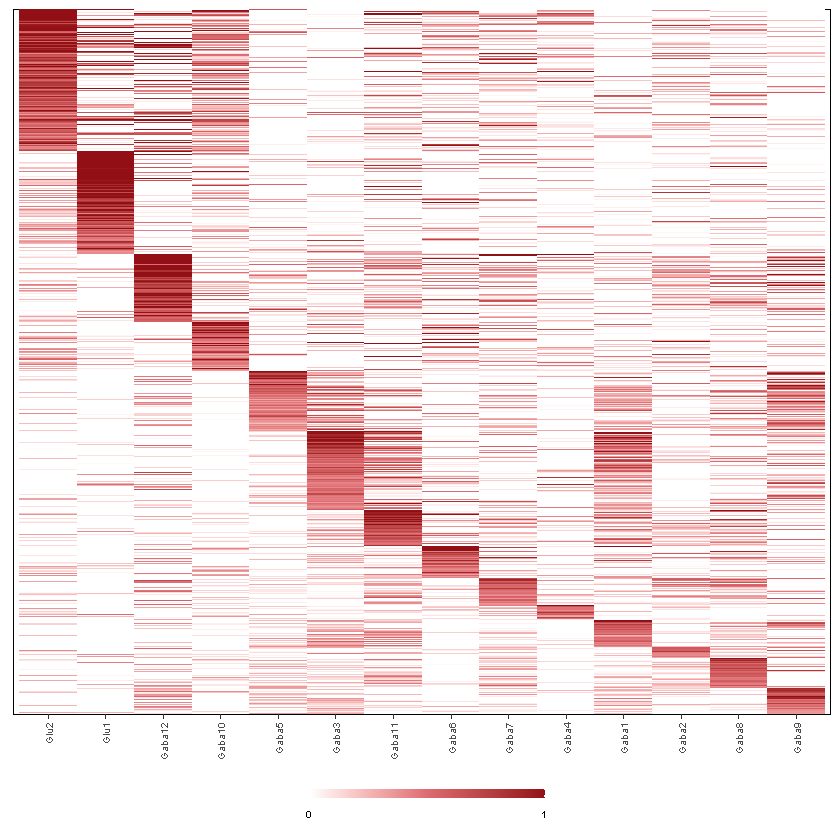

In [115]:
low<- 0
high<- 1
p<-ggplot(Cell_number, aes(gene, cluster))+ 
  geom_tile(aes(fill =zscore))+ 
scale_fill_gradient2(limits=c(low, high), breaks=seq(low,high,by=1),high = "#930F16",mid="#DD6B71",midpoint=0.50,low = "white",oob=squish)
pp<-p+
theme_classic()+
theme(axis.text.x=element_text( size=6, angle=90, hjust=1, vjust=.5),
            axis.text.y=element_blank(),
            plot.title = element_text(size=8),
            panel.background = element_rect(colour = "black", size=.25, fill=NA),
            axis.line.y = element_blank(),
            axis.line.x=element_blank(),
            axis.ticks.y = element_blank(),
            axis.title.y = element_blank(),
            axis.ticks.x = element_line(size=0.25),
            axis.title.x = element_blank(),
            legend.key.height= unit(0.2, 'cm'), 
            legend.key.width = unit(1.0, 'cm'),
            legend.position = "bottom",
            legend.text = element_text(size=6),
            legend.title = element_blank())+
coord_flip()
print(pp)

#### Plotting selected markers for each cell cluster

In [ ]:
LS.integrated <- NormalizeData(LS.integrated, assay='RNA')

In [ ]:
# Define an order of cluster identities
my_levels <- (c("Glu2","Glu1","Gaba12","Gaba10","Gaba5","Gaba3","Gaba11","Gaba6","Gaba7","Gaba4","Gaba1","Gaba2","Gaba8","Gaba9"))

# Relevel object@ident
Idents(LS.integrated) <- factor(x = Idents(LS.integrated), levels = my_levels)

In [ ]:
DotPlot(LS.integrated, feature = rev(c('Onecut2','Samd3','Foxp2','Tacr1','Crhr2','Sst','Pax6','Esr1','Col15a1','Drd3','Nts','Met')), cols=c('gray','red'), dot.scale=4) +
theme_classic()+
    theme(axis.title=element_blank(),
          axis.text.y=element_text(size=6,colour = "black"),
          axis.text.x=element_text(size=6,angle = 50, hjust =1,colour = "black"),
          axis.line = element_blank(),
          axis.ticks = element_line(size=0.25),
          legend.key.size = unit(0.4, "cm"),
          panel.background = element_rect(colour = "black", size=.25, fill=NA),
          legend.title = element_text(size=8),
          legend.text = element_text(size=6),
          legend.position='bottom')+
          coord_flip() 
ggsave(file="canonical_markers_new_legend.pdf",height=1.75, width=2.85)